# Zemax images into numpy files 

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from lib.formatter import zemax_to_array
from scipy import ndimage

In [3]:
zemax_to_array?

Signature: zemax_to_array(path_to_file)
Docstring: Coverts Zemax .txt filed to numpy arrays
File:      ~/Projects/Toliman/Modelling/lib/formatter.py
Type:      function


In [4]:
path = os.getcwd() + "/Zemax_files"
file_names = np.array(os.listdir(path + "/txt/"))

In [5]:
lams = np.linspace(0, 20, num=21)

out_old = []
out_new = []
angles_out = []
wavels_out = []

for i in range(21):
    temp_old = []
    temp_new = []
    temp_wavels = []
    temp_angles = []
    
    for j in range(len(file_names)):
        if "_" + str(np.round(lams[i])) in file_names[j]:
            
            temp_old.append(file_names[j])
            
            new_name = file_names[j][4:-9]
            if file_names[j][-10] == "4":
                new_name = file_names[j][4:-10] + "5"
            elif file_names[j][-10] == "9":
                val = int(file_names[j][-11]) + 1
                new_name = file_names[j][4:-11] + str(val) + "0"
            
            angle, wl = new_name.split("_")
            angle = int(angle[:-2])
            wl = int(wl)
            
            temp_angles.append(angle)
            temp_wavels.append(wl)
            temp_new.append([angle, wl])
    
    out_old.append(temp_old)
    out_new.append(temp_new)
    angles_out.append(temp_angles)
    wavels_out.append(temp_wavels)

In [6]:
PSFs = []
for i in range(len(out_old)):
    temp = []
    for j in range(len(out_old[i])):
        PSF, meta_data = zemax_to_array(path + "/txt/{}".format(out_old[i][j]))
        temp.append(PSF)
        np.save(path + "/npy/{}_{}.npy".format(out_new[i][j][0], out_new[i][j][1]), PSF)
    PSFs.append(temp)

In [7]:
num_wavels = 101
wavels = np.linspace(545, 645, num=num_wavels)

mu = wavels[num_wavels//2]
sig = num_wavels//4

a = 1/(2*np.pi*sig)
b = ((wavels-mu)/sig)**2
power = a*np.exp(-0.5*b)
weights = power/np.max(power)

weights_dict = {}
for i in range(num_wavels):
    weights_dict[wavels[i]] = weights[i]
    
num_wavels = 21
wavels = np.linspace(545, 645, num=num_wavels)

In [8]:
ZMX_pixel = 1.625e-6
Tboy_pixel = 6.5e-6
size_ratio = ZMX_pixel/Tboy_pixel

In [9]:
PSFs_weighted = []

for i in range(len(PSFs)):
    PSF_out = np.zeros(PSFs[0][0].shape)
    
    for j in range(num_wavels):
        PSF = PSFs[i][j]
        weight = weights_dict[wavels_out[i][j]]
        PSF_out += weight * PSF

#     PSF_out = ndimage.zoom(PSF_out, size_ratio)
    PSF_out = PSF_out/np.max(PSF_out)
    PSFs_weighted.append(PSF_out)

0


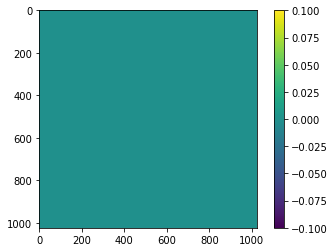

1


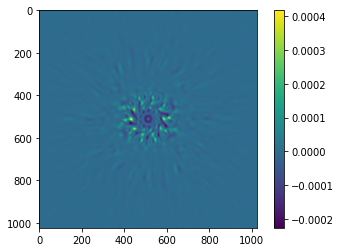

2


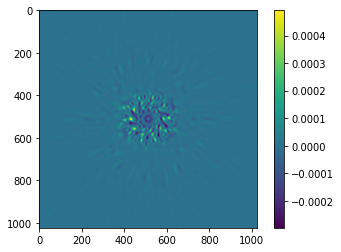

3


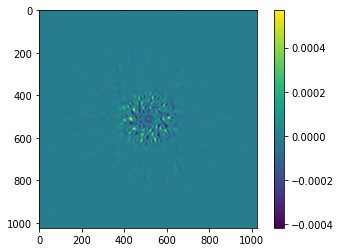

4


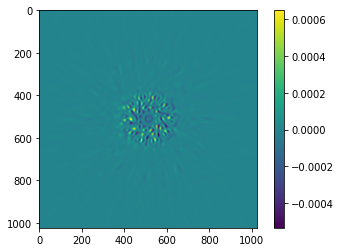

5


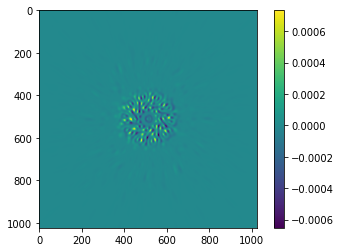

6


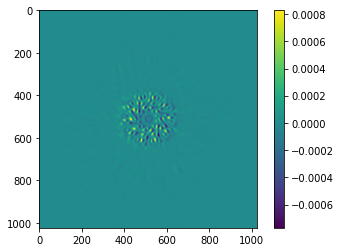

7


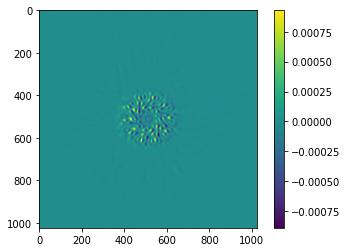

8


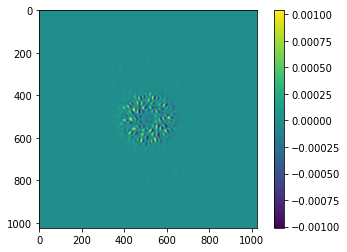

9


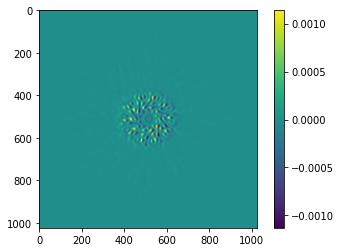

10


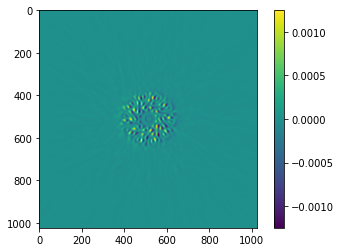

11


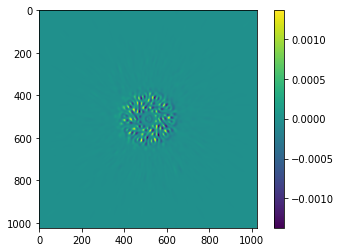

12


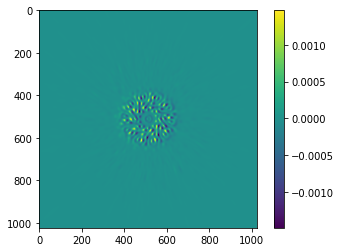

13


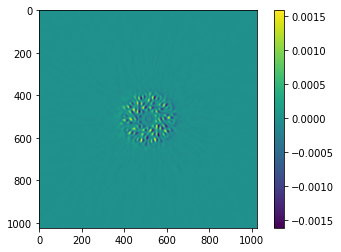

14


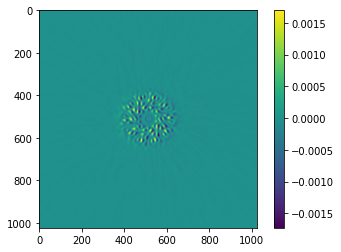

15


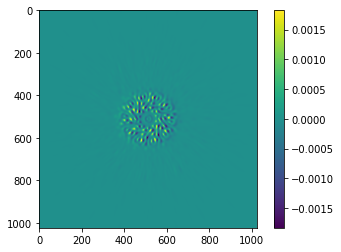

16


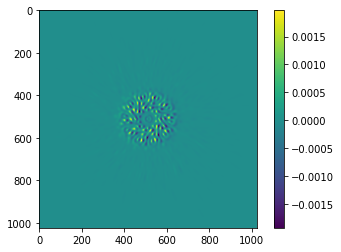

17


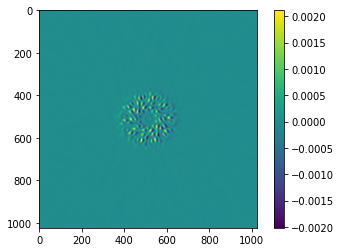

18


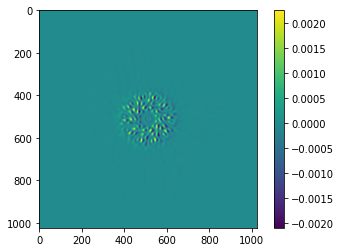

19


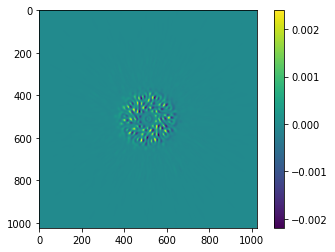

20


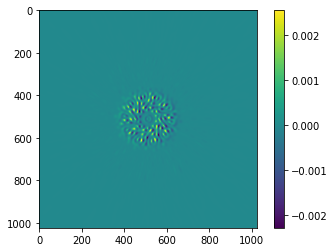

In [12]:
for i in range(21):
    print(i)
    plt.imshow(PSFs_weighted[0] - PSFs_weighted[i])
#     plt.imshow(PSFs_weighted[i])
    plt.colorbar()
    plt.show()

In [98]:
# for i in range(21):
#     np.save(path + "/broadband/{}.npy".format(i), PSFs_weighted[i])